<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 6 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Analysez les ventes d'une librairie</h2>
</div>

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
# Importation de Pandas
import pandas as pd
import matplotlib.pyplot as plt # Pour créer des graphiques 
import numpy as np # la manipulation de tableaux et la réalisation de calculs numériques
from scipy import stats # accéder à de nombreuses fonctions statistiques et distributions de probabilité fournies
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import kruskal


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
# Impoter les fichiers

# Utilisez des caractères d'échappement pour spécifier le chemin du fichier.
chemin_fichier_csv = "C:\\Users\\33621\\Documents\\Projet 6\\customers.csv"
# Chargez le fichier CSV en spécifiant le séparateur point-virgule.
df_customers = pd.read_csv(chemin_fichier_csv, sep=';')

# Importer le fichier products

# Utilisez des caractères d'échappement pour spécifier le chemin du fichier.
chemin_fichier_csv = "C:\\Users\\33621\\Documents\\Projet 6\\products.csv"
# Chargez le fichier CSV en spécifiant le séparateur point-virgule.
df_products = pd.read_csv(chemin_fichier_csv, sep=';')

# Importer le fichier transaction

# Utilisez des caractères d'échappement pour spécifier le chemin du fichier.
chemin_fichier_csv = "C:\\Users\\33621\\Documents\\Projet 6\\transactions.csv"
# Chargez le fichier CSV en spécifiant le séparateur point-virgule.
df_transactions = pd.read_csv(chemin_fichier_csv, sep=';')


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyses des fichiers </h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier customers</h3>
</div>

In [3]:
print('nombre de lignes:', df_customers.shape[0])
print('nombre de colonnes:', df_customers.shape[1])

nombre de lignes: 8621
nombre de colonnes: 3


In [4]:
# Regarder le pourcentage des éléments nulles dans chaque colonne 
df_customers.apply(lambda x:x.isnull().value_counts())

,client_id,sex,birth
False,8621,8621,8621


In [5]:
# Regarder les doublons pour chaque colonne 
df_customers.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8616    False
8617    False
8618    False
8619    False
8620    False
Length: 8621, dtype: bool

In [6]:
df_customers.isna().value_counts()

client_id  sex    birth
False      False  False    8621
dtype: int64

In [7]:
df_customers[df_customers.duplicated() == True]

,client_id,sex,birth


In [8]:
df_customers.describe()

,birth
count,8621.000000
mean,1978.275606
std,16.917958
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier products</h3>
</div>

In [9]:
#valeurs nulles, doublon, erreur lexical, erreur irrégularité, erreur de formatage, outlier et valeurs atypique, aberrante 

In [10]:
print('nombre de lignes:', df_products.shape[0])
print('nombre de colonnes:', df_products.shape[1])

nombre de lignes: 3286
nombre de colonnes: 3


In [11]:
#
########df_products.groupby('categ').price.mean()

In [12]:
# Regarder le pourcentage des éléments nulles dans chaque colonne 
df_products.apply(lambda x:x.isnull().value_counts())

,id_prod,price,categ
False,3286,3286,3286


In [13]:
df_products.isnull().value_counts()

id_prod  price  categ
False    False  False    3286
dtype: int64

In [14]:
df_products.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3281    False
3282    False
3283    False
3284    False
3285    False
Length: 3286, dtype: bool

In [15]:
df_products[df_products.duplicated() == True]

,id_prod,price,categ


In [16]:
df_products.describe()

,price,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier transactions</h3>
</div>

In [17]:
print('nombre de lignes:', df_transactions.shape[0])
print('nombre de colonnes:', df_transactions.shape[1])

nombre de lignes: 687534
nombre de colonnes: 4


In [18]:
# Regarder le pourcentage des éléments nulles dans chaque colonne 
df_transactions.apply(lambda x:x.isnull().value_counts())

,id_prod,date,session_id,client_id
False,687534,687534,687534,687534


In [19]:
df_transactions.isna().value_counts()

id_prod  date   session_id  client_id
False    False  False       False        687534
dtype: int64

In [20]:
df_transactions.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
687529    False
687530    False
687531    False
687532    False
687533    False
Length: 687534, dtype: bool

In [21]:
df_transactions[df_transactions.duplicated() == True]

,id_prod,date,session_id,client_id


In [22]:
df_transactions.describe()

,id_prod,date,session_id,client_id
count,687534,687534,687534,687534
unique,3265,687419,345505,8600
top,1_369,2021-10-06 21:29:59.752585,s_118668,c_1609
freq,2340,2,14,25586


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jointure des fichiers</h2>
</div>

In [23]:
transactions_products = df_transactions.merge(df_products, on=['id_prod'], how='outer', indicator=True)

In [24]:
transactions_products._merge.value_counts()

both          687534
right_only        21
left_only          0
Name: _merge, dtype: int64

In [25]:
# Joindre le fichier customers et transactions avec la clé clien_id
customers_transations = df_customers.merge(df_transactions, on=['client_id'], how='outer', indicator=True)
customers_transations

,client_id,sex,birth,id_prod,date,session_id,_merge
0,c_4410,f,1967,1_483,2021-03-13 21:35:55.949042,s_5913,both
1,c_4410,f,1967,0_1111,2021-03-22 01:27:49.480137,s_9707,both
2,c_4410,f,1967,1_385,2021-03-22 01:40:22.782925,s_9707,both
3,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,both
4,c_4410,f,1967,0_1420,2021-03-22 22:31:25.825764,s_10092,both
...,...,...,...,...,...,...,...
687550,c_84,f,1982,0_1472,2022-05-14 00:24:49.391917,s_208110,both
687551,c_84,f,1982,0_1438,2022-05-29 06:11:50.316631,s_215697,both
687552,c_84,f,1982,1_459,2022-12-17 00:16:56.629536,s_313173,both
687553,c_84,f,1982,0_1104,2022-12-17 00:24:14.357525,s_313173,both


In [26]:
customers_transations._merge.value_counts()

both          687534
left_only         21
right_only         0
Name: _merge, dtype: int64

In [27]:
customers_transations[customers_transations['_merge'] == 'left_only']

,client_id,sex,birth,id_prod,date,session_id,_merge
60134,c_8253,f,2001,NaN,NaN,NaN,left_only
202567,c_3789,f,1997,NaN,NaN,NaN,left_only
220670,c_4406,f,1998,NaN,NaN,NaN,left_only
222930,c_2706,f,1967,NaN,NaN,NaN,left_only
228157,c_3443,m,1959,NaN,NaN,NaN,left_only
251338,c_4447,m,1956,NaN,NaN,NaN,left_only
251898,c_3017,f,1992,NaN,NaN,NaN,left_only
264087,c_4086,f,1992,NaN,NaN,NaN,left_only
316669,c_6930,m,2004,NaN,NaN,NaN,left_only
323346,c_4358,m,1999,NaN,NaN,NaN,left_only


In [28]:
customers_transations = customers_transations[customers_transations['_merge'] == 'both']

In [29]:
del customers_transations['_merge']

In [30]:
customers_transations

,client_id,sex,birth,id_prod,date,session_id
0,c_4410,f,1967,1_483,2021-03-13 21:35:55.949042,s_5913
1,c_4410,f,1967,0_1111,2021-03-22 01:27:49.480137,s_9707
2,c_4410,f,1967,1_385,2021-03-22 01:40:22.782925,s_9707
3,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942
4,c_4410,f,1967,0_1420,2021-03-22 22:31:25.825764,s_10092
...,...,...,...,...,...,...
687550,c_84,f,1982,0_1472,2022-05-14 00:24:49.391917,s_208110
687551,c_84,f,1982,0_1438,2022-05-29 06:11:50.316631,s_215697
687552,c_84,f,1982,1_459,2022-12-17 00:16:56.629536,s_313173
687553,c_84,f,1982,0_1104,2022-12-17 00:24:14.357525,s_313173


In [31]:
df_finale = customers_transations.merge(df_products, on=['id_prod'], how='outer', indicator=True)
df_finale

,client_id,sex,birth,id_prod,date,session_id,price,categ,_merge
0,c_4410,f,1967.0,1_483,2021-03-13 21:35:55.949042,s_5913,15.99,1,both
1,c_4410,f,1967.0,1_483,2022-03-13 21:35:55.949042,s_178686,15.99,1,both
2,c_4410,f,1967.0,1_483,2022-05-13 21:35:55.949042,s_208054,15.99,1,both
3,c_6446,m,1971.0,1_483,2021-10-21 16:09:28.332092,s_109855,15.99,1,both
4,c_7049,f,1987.0,1_483,2021-10-02 00:06:53.783104,s_100270,15.99,1,both
...,...,...,...,...,...,...,...,...,...
687550,NaN,NaN,NaN,0_1624,NaN,NaN,24.50,0,right_only
687551,NaN,NaN,NaN,2_86,NaN,NaN,132.36,2,right_only
687552,NaN,NaN,NaN,0_299,NaN,NaN,22.99,0,right_only
687553,NaN,NaN,NaN,0_510,NaN,NaN,23.66,0,right_only


In [32]:
df_finale._merge.value_counts()

both          687534
right_only        21
left_only          0
Name: _merge, dtype: int64

In [33]:
df_finale[df_finale['_merge'] == 'right_only']

,client_id,sex,birth,id_prod,date,session_id,price,categ,_merge
687534,NaN,NaN,NaN,0_1016,NaN,NaN,35.06,0,right_only
687535,NaN,NaN,NaN,0_1780,NaN,NaN,1.67,0,right_only
687536,NaN,NaN,NaN,0_1062,NaN,NaN,20.08,0,right_only
687537,NaN,NaN,NaN,0_1119,NaN,NaN,2.99,0,right_only
687538,NaN,NaN,NaN,0_1014,NaN,NaN,1.15,0,right_only
687539,NaN,NaN,NaN,1_0,NaN,NaN,31.82,1,right_only
687540,NaN,NaN,NaN,0_1318,NaN,NaN,20.92,0,right_only
687541,NaN,NaN,NaN,0_1800,NaN,NaN,22.05,0,right_only
687542,NaN,NaN,NaN,0_1645,NaN,NaN,2.99,0,right_only
687543,NaN,NaN,NaN,0_322,NaN,NaN,2.99,0,right_only


In [34]:
df_finale[df_finale['_merge'] == 'both']

,client_id,sex,birth,id_prod,date,session_id,price,categ,_merge
0,c_4410,f,1967.0,1_483,2021-03-13 21:35:55.949042,s_5913,15.99,1,both
1,c_4410,f,1967.0,1_483,2022-03-13 21:35:55.949042,s_178686,15.99,1,both
2,c_4410,f,1967.0,1_483,2022-05-13 21:35:55.949042,s_208054,15.99,1,both
3,c_6446,m,1971.0,1_483,2021-10-21 16:09:28.332092,s_109855,15.99,1,both
4,c_7049,f,1987.0,1_483,2021-10-02 00:06:53.783104,s_100270,15.99,1,both
...,...,...,...,...,...,...,...,...,...
687529,c_8138,f,1984.0,0_394,2021-11-09 09:02:38.299240,s_116986,2.14,0,both
687530,c_8138,f,1984.0,0_394,2022-03-09 09:02:38.299240,s_176587,2.14,0,both
687531,c_8138,f,1984.0,0_394,2022-08-09 09:02:38.299240,s_250653,2.14,0,both
687532,c_8327,m,1972.0,0_394,2021-12-28 22:44:11.200205,s_141516,2.14,0,both


In [35]:
del df_finale['_merge']

In [36]:
df_finale

,client_id,sex,birth,id_prod,date,session_id,price,categ
0,c_4410,f,1967.0,1_483,2021-03-13 21:35:55.949042,s_5913,15.99,1
1,c_4410,f,1967.0,1_483,2022-03-13 21:35:55.949042,s_178686,15.99,1
2,c_4410,f,1967.0,1_483,2022-05-13 21:35:55.949042,s_208054,15.99,1
3,c_6446,m,1971.0,1_483,2021-10-21 16:09:28.332092,s_109855,15.99,1
4,c_7049,f,1987.0,1_483,2021-10-02 00:06:53.783104,s_100270,15.99,1
...,...,...,...,...,...,...,...,...
687550,NaN,NaN,NaN,0_1624,NaN,NaN,24.50,0
687551,NaN,NaN,NaN,2_86,NaN,NaN,132.36,2
687552,NaN,NaN,NaN,0_299,NaN,NaN,22.99,0
687553,NaN,NaN,NaN,0_510,NaN,NaN,23.66,0


In [37]:
# Le nombre de NaN dans chaque colonne.
nombre_de_nan_par_colonne = df_finale.isna().sum()

# Afficher
nombre_de_nan_par_colonne

client_id     21
sex           21
birth         21
id_prod        0
date          21
session_id    21
price          0
categ          0
dtype: int64

In [38]:
# Supprimer les NaN
df_finale = df_finale.dropna()

In [39]:
# Le nombre de NaN dans chaque colonne.
nombre_de_nan_par_colonne = df_finale.isna().sum()

# Afficher
nombre_de_nan_par_colonne

client_id     0
sex           0
birth         0
id_prod       0
date          0
session_id    0
price         0
categ         0
dtype: int64

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Calculs </h2>
</div>

In [40]:
#rajout de la colonne age
import datetime
today = datetime.date.today()
year = today.strftime("%Y")
df_finale['age'] = int(year) - df_finale['birth']

C:\Users\33621\AppData\Local\Temp\ipykernel_25052\4229482722.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finale['age'] = int(year) - df_finale['birth']


In [41]:
# Supprimez ou remplacez les valeurs d'heure non valides par '00:00:00'.
df_finale['date'] = df_finale['date'].str.replace(' 24:', ' 00:', regex=True)

# Maintenant, vous pouvez diviser la colonne 'date'.
df_finale['Année'] = pd.to_datetime(df_finale['date']).dt.year
df_finale['Mois'] = pd.to_datetime(df_finale['date']).dt.month
df_finale['Jour'] = pd.to_datetime(df_finale['date']).dt.day
df_finale['weekday'] = pd.to_datetime(df_finale['date']).dt.weekday


C:\Users\33621\AppData\Local\Temp\ipykernel_25052\1179111314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finale['date'] = df_finale['date'].str.replace(' 24:', ' 00:', regex=True)
C:\Users\33621\AppData\Local\Temp\ipykernel_25052\1179111314.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finale['Année'] = pd.to_datetime(df_finale['date']).dt.year
C:\Users\33621\AppData\Local\Temp\ipykernel_25052\1179111314.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [42]:
# S'assurer que la colonne 'date' est correctement convertie en format de date
df_finale['date'] = pd.to_datetime(df_finale['date']).dt.date
df_finale['date'] = pd.to_datetime(df_finale['date'])
# Triez le DataFrame par date 
df_finale.sort_values(by='date', inplace=True)

C:\Users\33621\AppData\Local\Temp\ipykernel_25052\2561361798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finale['date'] = pd.to_datetime(df_finale['date']).dt.date
C:\Users\33621\AppData\Local\Temp\ipykernel_25052\2561361798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finale['date'] = pd.to_datetime(df_finale['date'])
C:\Users\33621\AppData\Local\Temp\ipykernel_25052\2561361798.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cav

In [43]:
# Remplacer les NaN par 0 dans la colonne "birth"
df_finale['birth'].fillna(0, inplace=True)

# Convertir la colonne "birth" en type entier
df_finale['birth'] = df_finale['birth'].astype(int)

C:\Users\33621\AppData\Local\Temp\ipykernel_25052\277276197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finale['birth'].fillna(0, inplace=True)
C:\Users\33621\AppData\Local\Temp\ipykernel_25052\277276197.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finale['birth'] = df_finale['birth'].astype(int)


En tout, nous avons 3265 produits.
2292  produits dans la catégorie 0
737  produits dans la catégorie 1
236  produits dans la catégorie 2


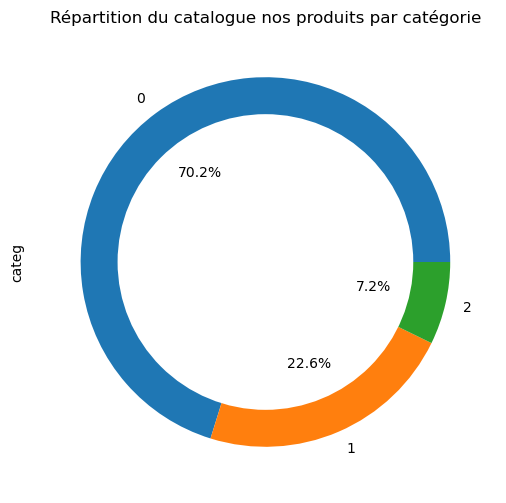

In [44]:
# Répartition des produits par catégorie
categ = df_finale[['id_prod','categ']].groupby('id_prod').value_counts().reset_index().rename(columns={0:'quantité'})
print('En tout, nous avons',len(categ),'produits.')
print(len(categ.loc[categ['categ']==0]),' produits dans la catégorie 0')
print(len(categ.loc[categ['categ']==1]),' produits dans la catégorie 1')
print(len(categ.loc[categ['categ']==2]),' produits dans la catégorie 2')

categpie = categ['categ'].value_counts()
plt.figure(figsize=(6,6))
categpie.plot(kind='pie',autopct='%1.1f%%')
plt.title('Répartition du catalogue nos produits par catégorie')
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


,catégorie,quantité vendu
0,0,415459
1,1,235592
2,2,36483


Text(0.5, 1.0, 'Répartition des ventes par catégorie')

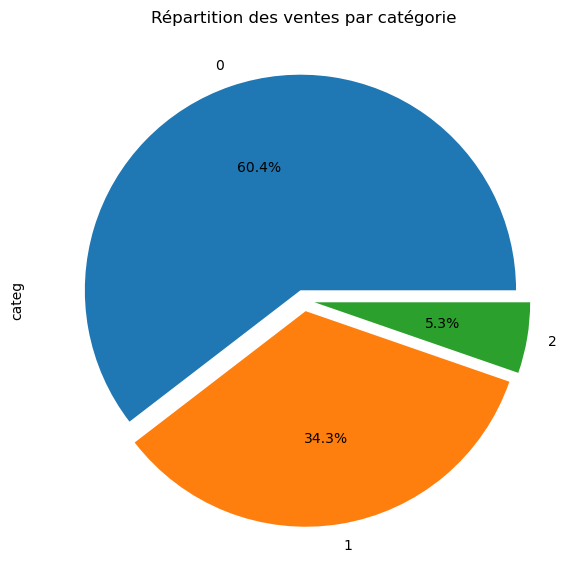

In [45]:
# Nombre de ventes par catégorie
display(df_finale['categ'].value_counts().reset_index().rename(columns={'index':'catégorie','categ':'quantité vendu'}))
plt.figure(figsize=(7,7))
df_finale["categ"].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',explode=(0.05,0.05,0.05))
plt.title('Répartition des ventes par catégorie')

In [46]:
# Les meilleures ventes par catégorie
print('TOP 5 (Meilleures ventes de la catégorie 0):')
display(categ.loc[categ['categ']==0].sort_values('quantité',ascending=False).head())
print('TOP 5 (Meilleures ventes de la catégorie 1):')
display(categ.loc[categ['categ']==1].sort_values('quantité',ascending=False).head())
print('TOP 5 (Meilleures ventes de la catégorie 2):')
display(categ.loc[categ['categ']==2].sort_values('quantité',ascending=False).head())

TOP 5 (Meilleures ventes de la catégorie 0):


,id_prod,categ,quantité
466,0_1422,0,1292
476,0_1431,0,1282
469,0_1425,0,1266
477,0_1432,0,1254
454,0_1411,0,1246


TOP 5 (Meilleures ventes de la catégorie 1):


,id_prod,categ,quantité
2591,1_369,1,2340
2644,1_417,1,2269
2641,1_414,1,2246
2733,1_498,1,2202
2653,1_425,1,2163


TOP 5 (Meilleures ventes de la catégorie 2):


,id_prod,categ,quantité
3034,2_102,2,1027
3070,2_135,2,1005
3045,2_112,2,968
3201,2_39,2,915
3199,2_37,2,882


In [47]:
# Les flops ventes par catégorie 
print('TOP 5 (flops ventes de la catégorie 0):')
display(categ.loc[categ['categ']==0].sort_values('quantité',ascending=True).head())
print('TOP 5 (flops ventes de la catégorie 1):')
display(categ.loc[categ['categ']==1].sort_values('quantité',ascending=True).head())
print('TOP 5 (flops ventes de la catégorie 2):')
display(categ.loc[categ['categ']==2].sort_values('quantité',ascending=True).head())

TOP 5 (flops ventes de la catégorie 0):


,id_prod,categ,quantité
698,0_1633,0,1
549,0_1498,0,1
1327,0_2201,0,1
595,0_1539,0,1
2108,0_833,0,1


TOP 5 (flops ventes de la catégorie 1):


,id_prod,categ,quantité
2752,1_514,1,2
2648,1_420,1,2
2628,1_402,1,2
2630,1_404,1,3
2635,1_409,1,3


TOP 5 (flops ventes de la catégorie 2):


,id_prod,categ,quantité
3263,2_98,2,1
3175,2_23,2,1
3247,2_81,2,1
3258,2_93,2,2
3242,2_77,2,2


In [48]:
# TOP 5 des CA par catégorie
price = df_finale[['id_prod','categ','price']].groupby('id_prod').value_counts().reset_index().rename(columns={0:'quantité'})
price['CA'] = (price['price']*price['quantité']).round(2)

print('TOP 5 (Meilleures ventes de la catégories 0):')
display(price.loc[price['categ']==0][['id_prod','price','quantité','CA']].sort_values('CA',ascending=False).head())
print('TOP 5 (Meilleures ventes de la catégories 1):')
display(price.loc[price['categ']==1][['id_prod','price','quantité','CA']].sort_values('CA',ascending=False).head())
print('TOP 5 (Meilleures ventes de la catégories 2):')
display(price.loc[price['categ']==2][['id_prod','price','quantité','CA']].sort_values('CA',ascending=False).head())

TOP 5 (Meilleures ventes de la catégories 0):


,id_prod,price,quantité,CA
487,0_1441,18.99,1235,23452.65
465,0_1421,19.99,1151,23008.49
457,0_1414,19.38,1150,22287.00
498,0_1451,19.99,1085,21689.15
460,0_1417,17.99,1188,21372.12


TOP 5 (Meilleures ventes de la catégories 1):


,id_prod,price,quantité,CA
2619,1_395,28.99,1953,56617.47
2591,1_369,23.99,2340,56136.60
2607,1_383,28.99,1857,53834.43
2641,1_414,23.83,2246,53522.18
2733,1_498,23.37,2202,51460.74


TOP 5 (Meilleures ventes de la catégories 2):


,id_prod,price,quantité,CA
3096,2_159,145.99,650,94893.50
3070,2_135,68.99,1005,69334.95
3045,2_112,67.57,968,65407.76
3034,2_102,59.14,1027,60736.78
3152,2_209,69.99,814,56971.86


In [49]:
#TOP 5 des flops CA par catégorie
price = df_finale[['id_prod','categ','price']].groupby('id_prod').value_counts().reset_index().rename(columns={0:'quantité'})
price['CA'] = (price['price']*price['quantité']).round(2)

print('TOP 5 (Flops ventes de la catégories 0):')
display(price.loc[price['categ']==0][['id_prod','price','quantité','CA']].sort_values('CA',ascending=True).head())
print('TOP 5 (Flops ventes de la catégories 1):')
display(price.loc[price['categ']==1][['id_prod','price','quantité','CA']].sort_values('CA',ascending=True).head())
print('TOP 5 (Flops ventes de la catégories 2):')
display(price.loc[price['categ']==2][['id_prod','price','quantité','CA']].sort_values('CA',ascending=True).head())

TOP 5 (Flops ventes de la catégories 0):


,id_prod,price,quantité,CA
595,0_1539,0.99,1,0.99
313,0_1284,1.38,1,1.38
719,0_1653,0.99,2,1.98
2079,0_807,1.99,1,1.99
665,0_1601,1.99,1,1.99


TOP 5 (Flops ventes de la catégories 1):


,id_prod,price,quantité,CA
2648,1_420,7.12,2,14.24
2431,1_224,4.95,4,19.80
2703,1_470,5.41,4,21.64
2706,1_473,2.99,9,26.91
2630,1_404,9.85,3,29.55


TOP 5 (Flops ventes de la catégories 2):


,id_prod,price,quantité,CA
3247,2_81,86.99,1,86.99
3175,2_23,115.99,1,115.99
3263,2_98,149.74,1,149.74
3258,2_93,78.99,2,157.98
3039,2_107,33.99,6,203.94


In [50]:
price

,id_prod,categ,price,quantité,CA
0,0_0,0,3.75,1242,4657.50
1,0_1,0,10.99,487,5352.13
2,0_10,0,17.95,22,394.90
3,0_100,0,20.60,3,61.80
4,0_1000,0,6.84,432,2954.88
...,...,...,...,...,...
3260,2_95,2,98.99,4,395.96
3261,2_96,2,47.91,598,28650.18
3262,2_97,2,160.99,13,2092.87
3263,2_98,2,149.74,1,149.74


C:\Users\33621\AppData\Local\Temp\ipykernel_25052\217226540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finale['CA_total'] = df_finale['price'].sum()


,categ,CA
0,0,4419730.97
1,1,4827657.11
2,2,2780275.02


Text(0.5, 1.0, "Répartition du chiffre d'affaires par catégorie")

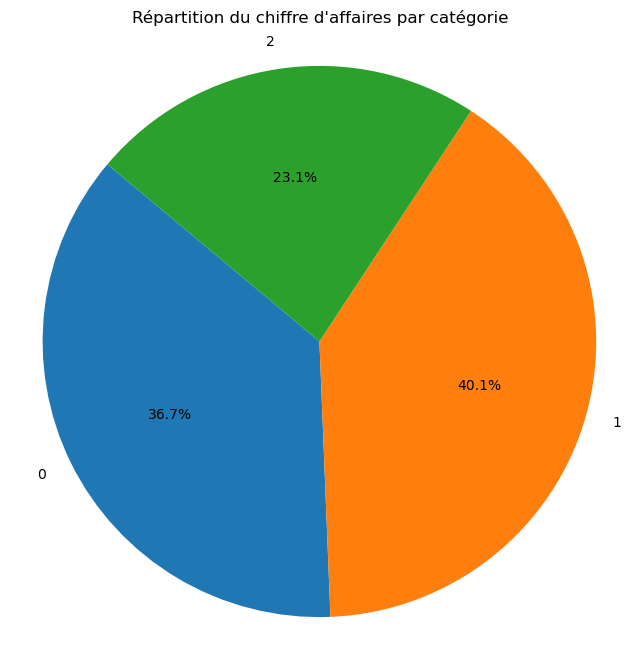

In [51]:
df_finale['CA_total'] = df_finale['price'].sum()

# CA par categorie
pricecateg = price.groupby('categ')['CA'].sum().reset_index()
display(pricecateg)

# Faire un graphqiue 'camembert' pour les catégories par rapport au CA 
plt.figure(figsize=(8, 8))
plt.pie(pricecateg['CA'], labels=pricecateg['categ'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Répartition du chiffre d\'affaires par catégorie')


In [52]:
df_finale

,client_id,sex,birth,id_prod,date,session_id,price,categ,age,Année,Mois,Jour,weekday,CA_total
227502,c_3341,f,1970,0_1345,2021-03-01,s_182,17.99,0,53.0,2021,3,1,0,12027663.1
185889,c_1112,f,1987,0_1075,2021-03-01,s_54,10.99,0,36.0,2021,3,1,0,12027663.1
77650,c_1609,m,1980,1_293,2021-03-01,s_124,22.99,1,43.0,2021,3,1,0,12027663.1
20177,c_580,m,1988,0_1110,2021-03-01,s_3,4.71,0,35.0,2021,3,1,0,12027663.1
372429,c_5613,f,1970,1_350,2021-03-01,s_167,20.83,1,53.0,2021,3,1,0,12027663.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637559,c_3960,f,1987,0_1255,2023-02-28,s_348336,10.99,0,36.0,2023,2,28,1,12027663.1
375145,c_840,m,1986,1_308,2023-02-28,s_348252,11.65,1,37.0,2023,2,28,1,12027663.1
389406,c_6623,m,1979,0_1507,2023-02-28,s_347981,3.99,0,44.0,2023,2,28,1,12027663.1
126719,c_5217,f,2004,1_285,2023-02-28,s_348387,14.99,1,19.0,2023,2,28,1,12027663.1


## Analyses des ventes au fil du temps 

C:\Users\33621\AppData\Local\Temp\ipykernel_25052\1748580614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finale['date'] = pd.to_datetime(df_finale['date'], errors='coerce')


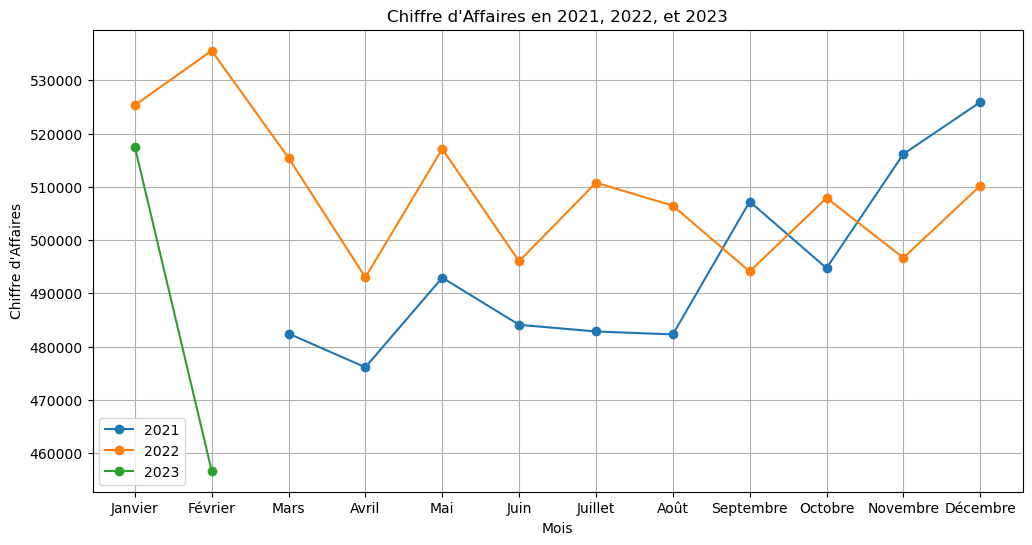

In [53]:
# Assurez-vous que la colonne 'date' est au format datetime.
df_finale['date'] = pd.to_datetime(df_finale['date'], errors='coerce')

# Filtrer les données pour chaque année (2021, 2022, 2023).
df_2021 = df_finale[df_finale['date'].dt.year == 2021]
df_2022 = df_finale[df_finale['date'].dt.year == 2022]
df_2023 = df_finale[df_finale['date'].dt.year == 2023]

# Grouper les données par mois et calculer le chiffre d'affaires total pour chaque année.
ca_2021_mois = df_2021.groupby(df_2021['date'].dt.month)['price'].sum()
ca_2022_mois = df_2022.groupby(df_2022['date'].dt.month)['price'].sum()
ca_2023_mois = df_2023.groupby(df_2023['date'].dt.month)['price'].sum()

# Créer le graphique en courbe pour 2021, 2022, et 2023.
plt.figure(figsize=(12, 6))
plt.plot(ca_2021_mois.index, ca_2021_mois.values, marker='o', linestyle='-', label='2021')
plt.plot(ca_2022_mois.index, ca_2022_mois.values, marker='o', linestyle='-', label='2022')
plt.plot(ca_2023_mois.index, ca_2023_mois.values, marker='o', linestyle='-', label='2023')
plt.xlabel('Mois')
plt.ylabel('Chiffre d\'Affaires')
plt.title('Chiffre d\'Affaires en 2021, 2022, et 2023')
plt.xticks(range(1, 13), ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre'])
plt.legend()
plt.grid(True)

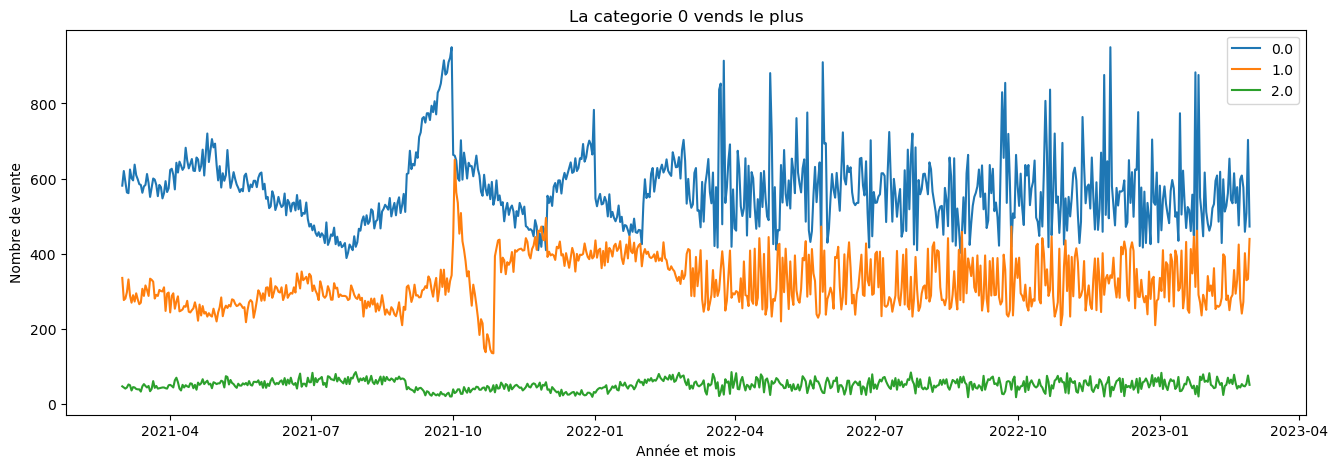

In [54]:
# Calculer le nombre de ventes par categorie

vente = df_finale.groupby('date')['categ'].value_counts().unstack().reset_index()
vente['date'] = pd.to_datetime(vente['date'])

plt.figure(figsize=(16,5))
plt.title('La categorie 0 vends le plus')
plt.plot(vente['date'],vente[0.0],label='0.0')
plt.plot(vente['date'],vente[1.0],label='1.0')
plt.plot(vente['date'],vente[2.0],label='2.0')
plt.xlabel('Année et mois')
plt.ylabel('Nombre de vente')
plt.legend()

Text(0.5, 0, 'Mois')

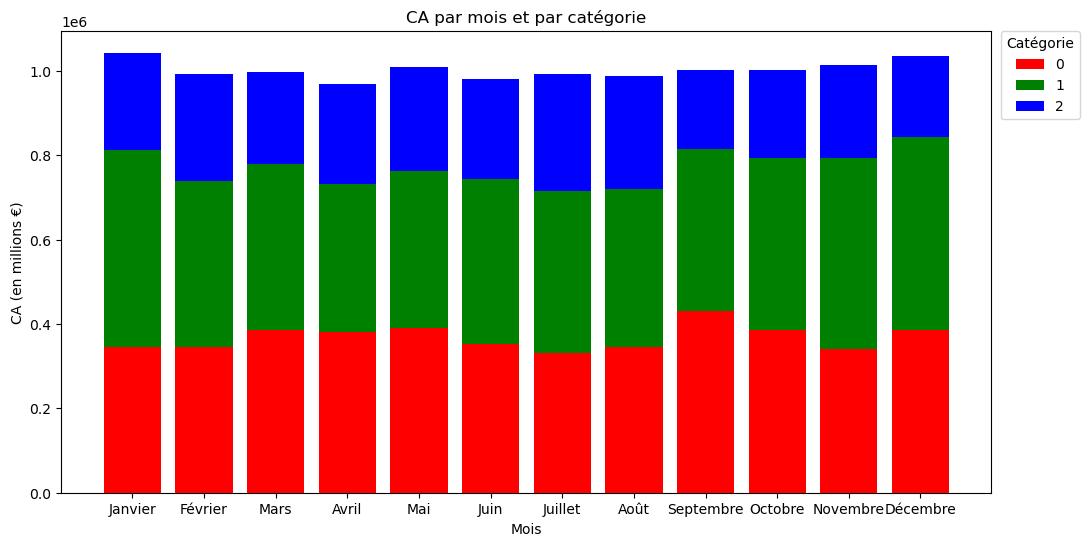

In [55]:
# Calcul du CA par mois par catégorie
CAmois = df_finale.groupby(['Mois', 'categ'])['price'].sum().reset_index()
CAmois['price'] = CAmois['price'].round(2)  # Arrondir la colonne "price" à 2 décimales

# Création du graphique en utilisant une boucle
plt.figure(figsize=(12, 6))

categories = CAmois['categ'].unique()
colors = ['red', 'green', 'blue']
months = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']

bottom = [0] * len(months)  # Ajustez la longueur de "bottom"

for i, cat in enumerate(categories):
    cat_data = CAmois[CAmois['categ'] == cat]
    plt.bar(cat_data['Mois'], cat_data['price'], bottom=bottom, color=colors[i], label=str(cat))
    bottom = [b + p for b, p in zip(bottom, cat_data['price'])]

plt.xticks(range(1, len(months) + 1), months)
plt.ylabel('CA (en millions €)')
plt.legend(title='Catégorie', bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.title('CA par mois et par catégorie')
plt.xlabel('Mois')

In [56]:
df_finale['Ca_weekday'] = df_finale.groupby('date')['price'].sum().round(2).reset_index(drop=True)


C:\Users\33621\AppData\Local\Temp\ipykernel_25052\2931461864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finale['Ca_weekday'] = df_finale.groupby('date')['price'].sum().round(2).reset_index(drop=True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


   weekday  Ca_weekday
0        0    16651.55
1        1    16375.08
2        2    16338.04
3        3    16534.67
4        4    16454.25
5        5    16522.88
6        6    16448.63


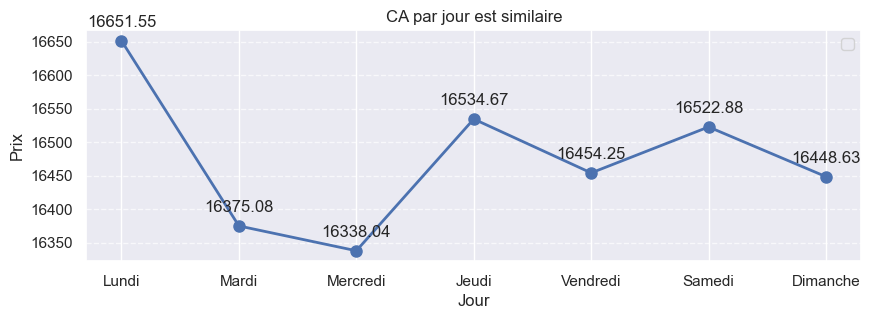

In [57]:
# Montant du CA par jour
panier = df_finale.groupby('weekday')['Ca_weekday'].mean().round(2).reset_index()
print(panier)
# Utilisation de seaborn pour visualiser
sns.set()
plt.figure(figsize=(10, 3))
plt.plot(panier['weekday'], panier['Ca_weekday'], marker='o', linestyle='-', color='b', linewidth=2, markersize=8)
# Ajout des annotations pour afficher les valeurs numériques
for x, y in zip(panier['weekday'], panier['Ca_weekday']):
    plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')
plt.xlabel('Jour')
plt.xticks(np.arange(0, 7), ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche'])
plt.ylabel('Prix')
plt.title('CA par jour est similaire')
#plt.ylim(0, 20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

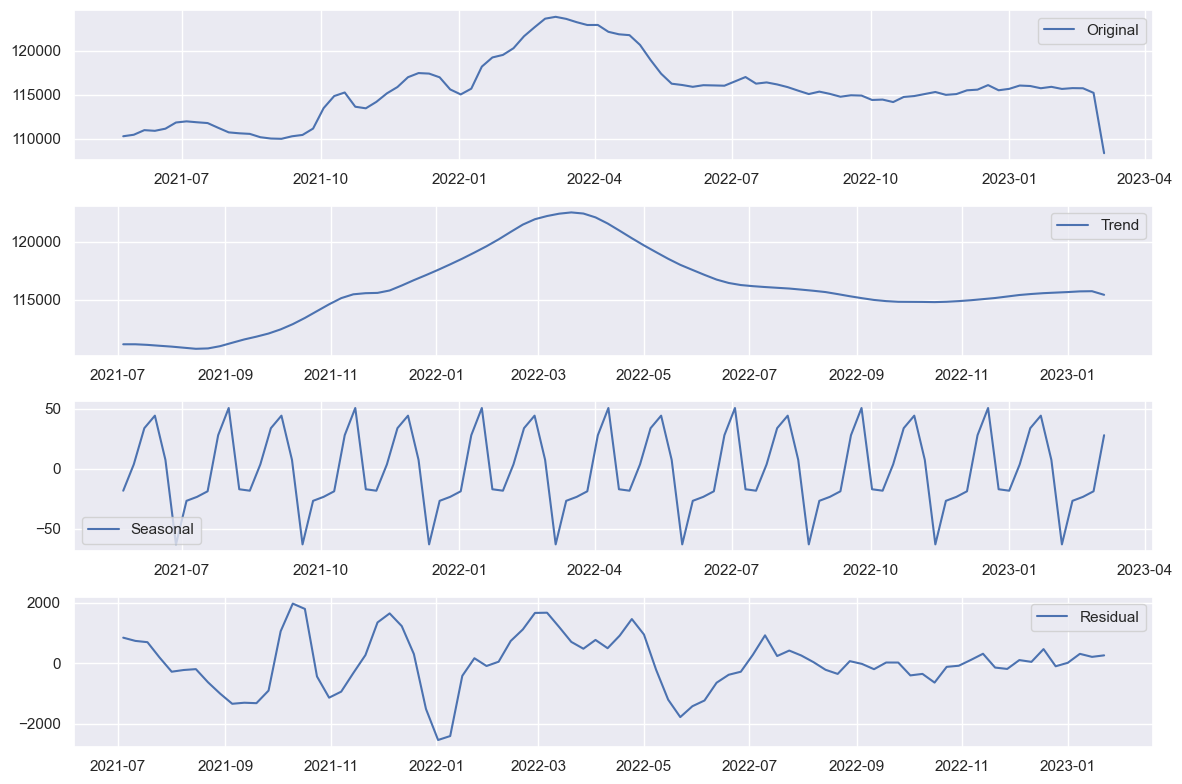

In [58]:
# Définir 'date' comme l'index du DataFrame
df_finale.set_index('date', inplace=True)

# Resample par semaine et calculer la somme pour chaque semaine
df_weekly = df_finale['price'].resample('W').sum()

# Calculer la moyenne mobile hebdomadaire sur une période glissante de 3 mois (12 semaines)
rolling_mean_12 = df_weekly.rolling(window=12).mean()

# Effectuer la décomposition saisonnière sur la moyenne mobile hebdomadaire
from statsmodels.tsa.seasonal import seasonal_decompose
add_decomp = seasonal_decompose(rolling_mean_12.dropna(), model='additive', period=12)

# Affichez les composants décomposés
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(rolling_mean_12.dropna(), label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(add_decomp.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(add_decomp.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(add_decomp.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()

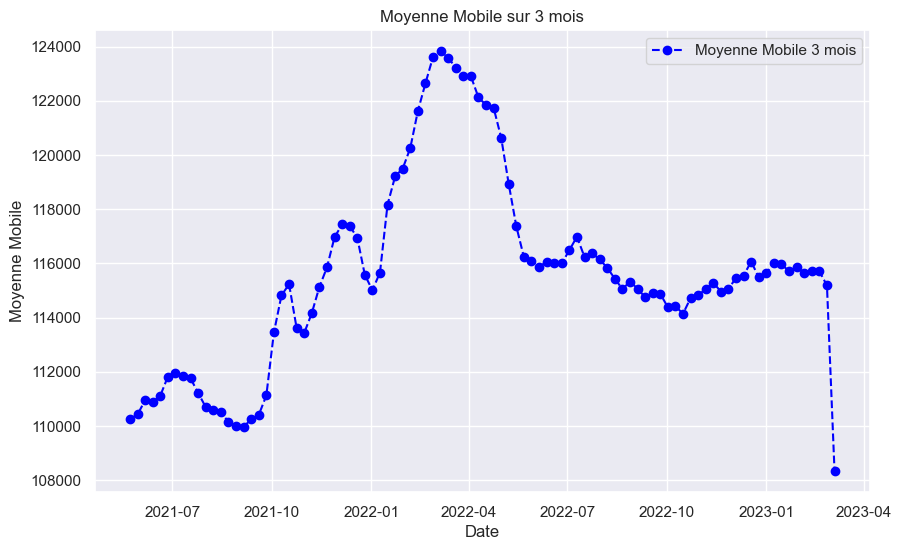

In [59]:
# Création du graphique pour la moyenne mobile
plt.figure(figsize=(10, 6))
plt.plot(rolling_mean_12.index, rolling_mean_12, marker='o', linestyle='--', color='blue', label='Moyenne Mobile 3 mois')
plt.title('Moyenne Mobile sur 3 mois')
plt.xlabel('Date')
plt.ylabel('Moyenne Mobile')
plt.grid(True)
plt.legend()
plt.show()

In [60]:
# Répartir les clients par genre

In [61]:
client_dep = df_finale.groupby('client_id')['price'].sum().reset_index().round(2)
achat = df_finale.groupby('client_id')['session_id'].value_counts().groupby('client_id').sum()
client_dep_achat = pd.merge(client_dep,achat,on='client_id',how='inner')
info = df_finale[['client_id','sex','age']].sort_values('client_id').drop_duplicates()
client = pd.merge(client_dep_achat,info,on='client_id',how='left')
client.sort_values('session_id',ascending=False).head()

,client_id,price,session_id,sex,age
677,c_1609,326039.89,25586,m,43.0
6337,c_6714,153918.60,9199,f,55.0
2724,c_3454,114110.57,6793,m,54.0
4388,c_4958,290227.03,5222,m,24.0
1268,c_2140,5260.18,405,f,46.0


In [62]:
# Regroupement par tranche d'age
client.loc[(client['age']>=19)&(client['age']<=31),'group']=1
client.loc[(client['age']>31)&(client['age']<=43),'group']=2
client.loc[(client['age']>43)&(client['age']<=55),'group']=3
client.loc[(client['age']>55)&(client['age']<=67),'group']=4
client.loc[(client['age']>67)&(client['age']<=79),'group']=5
client.loc[(client['age']>79),'group']=6

In [63]:
# Recherche de profil particulier avec plus de 500 connections pour achat
client.loc[client['session_id']>500].sort_values('price',ascending=False)

,client_id,price,session_id,sex,age,group
677,c_1609,326039.89,25586,m,43.0,2.0
4388,c_4958,290227.03,5222,m,24.0,1.0
6337,c_6714,153918.60,9199,f,55.0,3.0
2724,c_3454,114110.57,6793,m,54.0,3.0


Text(0.5, 1.0, 'Répartition des genres pour la quantité totale de ventes')

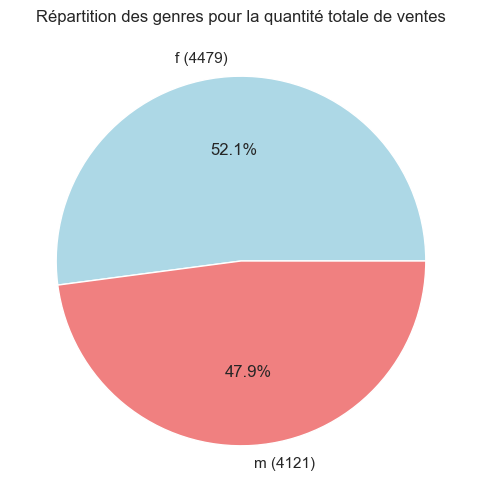

In [64]:
# Calcul de la répartition des genres hors pro
genre = client['sex'].value_counts()

# Création d'un diagramme circulaire (camembert) avec la quantité totale de ventes
plt.figure(figsize=(6, 6))
plt.pie(genre, labels=[f"{label} ({count})" for label, count in zip(genre.index, genre)], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title("Répartition des genres pour la quantité totale de ventes")

## Répartition en fonction de leur age

Text(0.5, 1.0, 'Répartitions des ages des clients avec leur genre')

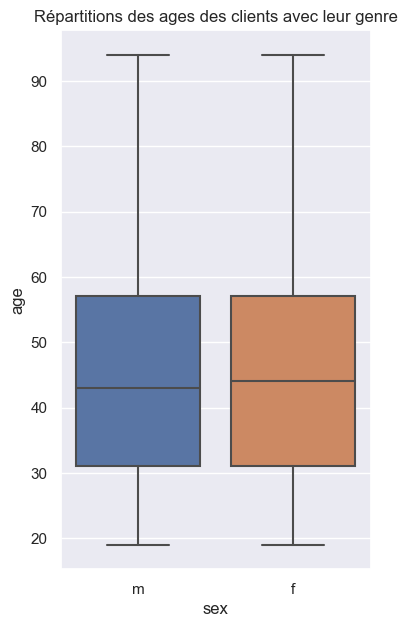

In [65]:
plt.figure(figsize=(4,7))
sns.boxplot(y=client['age'],x=client['sex'])
plt.title('Répartitions des ages des clients avec leur genre')

## Nos meilleurs clients (Pas d'entreprises)

In [66]:
# Nos meilleurs clients (Pas d'entreprises)
print('Nos meilleurs clients(en dépense):')
display(client.sort_values('price',ascending=False).head(3))


print('Nos clients les moins actifs(en dépense):')
display(client.sort_values('price').head(3))

Nos meilleurs clients(en dépense):


,client_id,price,session_id,sex,age,group
677,c_1609,326039.89,25586,m,43.0,2.0
4388,c_4958,290227.03,5222,m,24.0,1.0
6337,c_6714,153918.60,9199,f,55.0,3.0


Nos clients les moins actifs(en dépense):


,client_id,price,session_id,sex,age,group
8151,c_8351,6.31,1,f,55.0,3.0
7918,c_8140,8.30,2,m,52.0,3.0
7889,c_8114,9.98,2,m,61.0,4.0


## Répartition des dépenses clients

In [67]:
# Calculer la quantité vendue par client
quantite_par_client = df_finale.groupby('client_id')['categ'].count().reset_index()
quantite_par_client = quantite_par_client.rename(columns={'categ': 'quantité'})

# Fusionner les données de quantité par client dans le DataFrame "client" en utilisant la colonne "client_id" comme clé de jointure
client = client.merge(quantite_par_client, on='client_id', how='left')


0.44189587995615665

Text(0.5, 1.0, 'Courbe de Lorenz de la quantité de livres achetés par client')

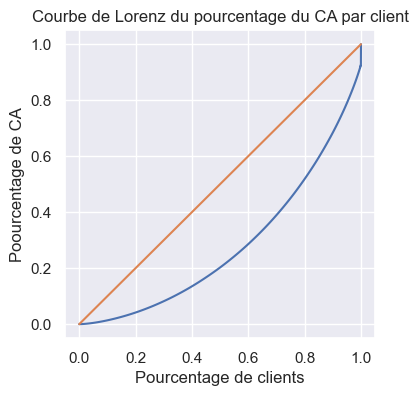

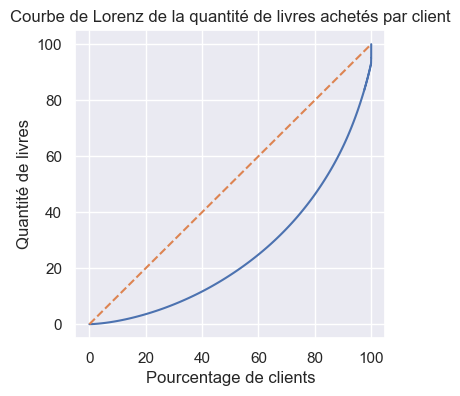

In [68]:
#Courbe de Lorenz (% de CA par clients)
lore = client[['client_id','price']].groupby('client_id',as_index=False).sum()
lore = lore['price'].values
n = len(lore)
lorenz = np.cumsum(np.sort(lore)) / lore.sum()
lorenz = np.append([0],lorenz)
plt.figure(figsize=(4,4))
xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1])

plt.xlabel('Pourcentage de clients')
plt.ylabel('Poourcentage de CA')
plt.title('Courbe de Lorenz du pourcentage du CA par client')


AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n
S = 0.5 - AUC
gini = 2*S
display(gini)

# Courbe de Lorenz (pour la quantité de livres vendus par client)
lore = client[['client_id', 'quantité']].groupby('client_id', as_index=False).sum()
lore = lore['quantité'].values
n = len(lore)
lorenz = np.cumsum(np.sort(lore)) / lore.sum()
lorenz = np.append([0], lorenz)

# Données pour l'axe des abscisses (pourcentage de clients)
xaxis = np.linspace(0, 100, n + 1)

# Données pour l'axe des ordonnées (quantité de livres)
yaxis = np.linspace(0, lore.sum(), n + 1)

plt.figure(figsize=(4, 4))
plt.plot(xaxis, lorenz * 100, drawstyle='steps-post')
plt.plot([0, 100], [0, 100], linestyle='--')

plt.xlabel('Pourcentage de clients')
plt.ylabel('Quantité de livres')
plt.title('Courbe de Lorenz de la quantité de livres achetés par client')


In [69]:
#Détection outliers IQR
Q1= client['price'].quantile(q=0.25)
Q3= client['price'].quantile(q=0.75)
IQR= Q3 - Q1
upper_lim = (Q3 + 1.5*IQR)

client_outliers = client[client['price']>upper_lim]
display(client_outliers.sort_values('price'))

,client_id,price,session_id,sex,age,group,quantité
3530,c_4182,3653.22,295,m,34.0,2.0,295
3215,c_3899,3654.40,267,m,43.0,2.0,267
7982,c_8199,3655.61,93,f,29.0,1.0,93
3139,c_383,3656.99,285,m,43.0,2.0,285
6924,c_7245,3659.80,235,f,40.0,2.0,235
...,...,...,...,...,...,...,...
634,c_1570,5285.82,370,f,44.0,3.0,370
2724,c_3454,114110.57,6793,m,54.0,3.0,6793
6337,c_6714,153918.60,9199,f,55.0,3.0,9199
4388,c_4958,290227.03,5222,m,24.0,1.0,5222


In [70]:
#Client B2B
df_client_totalca = df_finale.groupby("client_id")["price"].agg(total_client="sum")
df_client_totalca.sort_values(by="total_client", ascending=False, inplace=True)
df_client_totalca = df_client_totalca.reset_index()


In [71]:
df_client_totalca.head(6)

,client_id,total_client
0,c_1609,326039.89
1,c_4958,290227.03
2,c_6714,153918.60
3,c_3454,114110.57
4,c_1570,5285.82
5,c_3263,5276.87


In [72]:
# Liste des clients B2B
B2B_client = df_client_totalca.iloc[0:4]["client_id"]
B2B_client

0    c_1609
1    c_4958
2    c_6714
3    c_3454
Name: client_id, dtype: object

In [73]:
# Supprimer les lignes correspondant aux clients B2B
df_finale = df_finale[~df_finale['client_id'].isin(B2B_client)]

(0.0, 500.0)

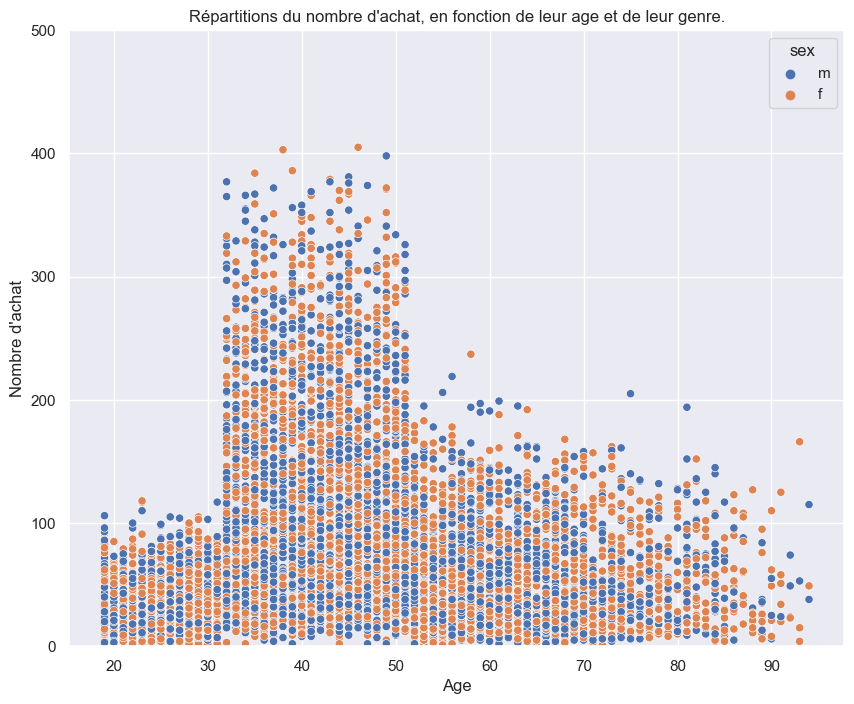

In [74]:
#Scatter plot 
plt.figure(figsize=(10,8))
plt.title("Répartitions du nombre d'achat, en fonction de leur age et de leur genre.")
sns.scatterplot(x=client['age'],hue=client['sex'],y=client['session_id'])
plt.xlabel("Age")
plt.ylabel("Nombre d'achat")
# Limiter l'axe y à 500
plt.ylim(0, 500)

In [75]:
# Afficher le nombre moyen d'achat 
for i in client['group'].sort_values().unique():
    print('Pour le group',i,", la moyenne du nombre d'achats est de:")
    display(round(client.loc[client['group']==i]['session_id'].mean()))

Pour le group 1.0 , la moyenne du nombre d'achats est de:


36

Pour le group 2.0 , la moyenne du nombre d'achats est de:


132

Pour le group 3.0 , la moyenne du nombre d'achats est de:


105

Pour le group 4.0 , la moyenne du nombre d'achats est de:


58

Pour le group 5.0 , la moyenne du nombre d'achats est de:


54

Pour le group 6.0 , la moyenne du nombre d'achats est de:


56

# JULIE

# Corrélation

# AGE CATEGORIE
## H0 : Pas de différence significative entre les groupes en termes d'âge p-valeur > 0.05.
## H1 : Il existe des différences significatives entre les groupes en termes d'âge p-valeur < 0.05

In [76]:
from scipy.stats import levene #l'égalité des variances entre les groupes

# Diviser les données en trois groupes en fonction des catégories.

groupe_1 = df_finale[df_finale['categ'] == 0]['age']
groupe_2 = df_finale[df_finale['categ'] == 1]['age']
groupe_3 = df_finale[df_finale['categ'] == 2]['age']

# Effectuez le test de Levene pour comparer les variances entre les groupes.

statistique_levene, valeur_p = levene(groupe_1, groupe_2, groupe_3)

# Affichez le résultat du test.

if valeur_p > 0.05:
    print("Il n'y a pas de différence significative entre les variances des groupes.")
else:
    print("Il y a une différence significative entre au moins un groupe.")
    print(f"La valeur de p est : {valeur_p}")



Il y a une différence significative entre au moins un groupe.
La valeur de p est : 0.0


In [77]:
import pingouin as pg

# Effectuez l'ANOVA de Welch
welch_anova_result = pg.welch_anova(data=df_finale, dv='age', between='categ')

# Afficher les résultats de l'ANOVA de Welch
print(welch_anova_result)

# Interprétation de l'ANOVA de Welch
alpha = 0.05  # Niveau de signification
if welch_anova_result['p-unc'][0] < alpha:
    print("Il existe des différences significatives entre les groupes.")
else:
    print("Aucune différence significative entre les groupes.")

  Source  ddof1         ddof2             F  p-unc       np2
0  categ      2  92781.559153  59012.439069    0.0  0.110271
Il existe des différences significatives entre les groupes.


In [78]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Effectuez le test post-hoc de Tukey
tukey_result = pairwise_tukeyhsd(df_finale['age'], df_finale['categ'])

# Afficher les résultats du test post-hoc
print(tukey_result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     0      1   3.8555   0.0   3.7736   3.9373   True
     0      2 -17.8291   0.0 -18.0054 -17.6527   True
     1      2 -21.6845   0.0  -21.866 -21.5031   True
-----------------------------------------------------


Text(0.5, 1.0, 'age en fonction de categ')

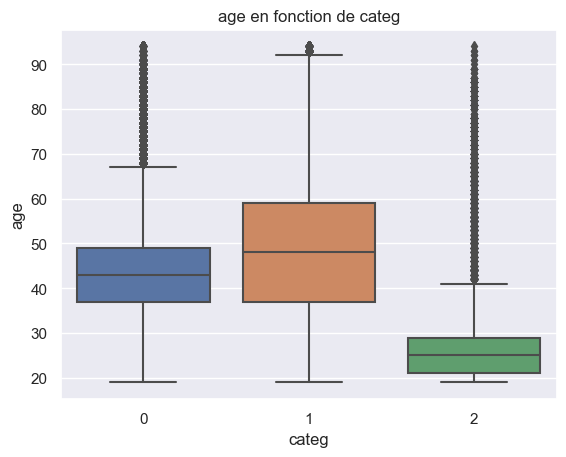

In [79]:
# Tracer le boxplot 
sns.boxplot(x="categ", y="age", data=df_finale).set_title('age en fonction de categ')

# Genre et catégorie
## H0 : Les variables "genre" et "catégorie" sont indépendantes. pvaleur > 0.05
## H1 : Il existe une dépendance ou une association significative entre les variables "genre" et "catégorie". pvaleur < 0.05

In [80]:
# Deux variables qualitatives ('sex'), ('categ')
# calculer le tableau de contingence
contingence = pd.crosstab(df_finale.categ, df_finale.sex)
contingence

sex,f,m
categ,,
0,200793,186488
1,115721,104884
2,16980,15868


In [81]:
# Test chi2 pour déterminer si la relation potentielle entre les variables est suffisamment significative :
st_chi2, st_p, st_dof, st_exp = chi2_contingency(contingence)
st_chi2, st_p, st_dof, st_exp

# Affichage de chaque résultat
print("Statistique du chi2 :", st_chi2)
print("Valeur p :", st_p)
print("Degré de liberté :", st_dof)

alpha = 0.05 # Niveau signification 
if st_p < alpha:
    print('La p-valeur est inférieure au niveau de signification.')
    print('On rejette l\'hypothèse nulle.')
    print('Il existe une signification entre les variables genre et catégorie.')
else: 
    print('La p-valeur est supérieure au niveau de signification.')
    print('On ne rejette pas l\'hypothèse nulle.')
    print('Les variables genre et catégorie sont considérées comme indépendantes.')

Statistique du chi2 : 22.66856665178056
Valeur p : 1.1955928116587024e-05
Degré de liberté : 2
La p-valeur est inférieure au niveau de signification.
On rejette l'hypothèse nulle.
Il existe une signification entre les variables genre et catégorie.


In [82]:
# Calcul du coefficient de cramer
cramer_v = np.sqrt(st_chi2 / (df_finale.shape[0] * (min(contingence.shape) - 1)))

# Affichage du coefficient de cramer
print("Coefficient de Cramer :", cramer_v)

Coefficient de Cramer : 0.005948029928802536


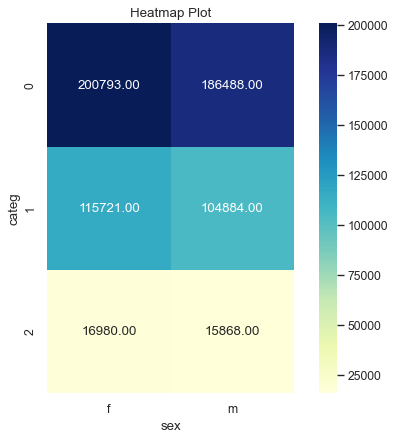

In [83]:
# Tracer la carte thermique 
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(contingence, annot=True, fmt='.2f', cmap="YlGnBu", vmin=contingence.min().min(), vmax=contingence.max().max())
plt.title('Heatmap Plot',fontsize=12)
plt.show()

# Age et montat total d'achat 
## H0 : Pas de corrélation / p-value > 0.05
## H1 : Corrélation / p-value < 0.05


In [84]:
df_finale['CA_total'] = df_finale['price'].sum()
# Calculer la somme de chaque catégorie pour la variable quantitative
tmp = df_finale.groupby('age')['CA_total'].sum().reset_index()

C:\Users\33621\AppData\Local\Temp\ipykernel_25052\2214123315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finale['CA_total'] = df_finale['price'].sum()


In [85]:
from scipy.stats import shapiro

# Effectuer le test de normalité de Shapiro-Wilk
shapiro_stat, shapiro_p_value = shapiro(df_finale['CA_total'])

# Afficher les résultats
print("Statistique de test de normalité (Shapiro-Wilk) :", shapiro_stat)
print("Valeur p du test de normalité (Shapiro-Wilk) :", shapiro_p_value)

alpha = 0.05  # Niveau de signification

if shapiro_p_value < alpha:
    print('La p-valeur est inférieure au niveau de signification.')
    print('On rejette l\'hypothèse nulle.')
    print('Les données ne suivent pas une distribution normale.')
else:
    print('La p-valeur est supérieure au niveau de signification.')
    print('On ne rejette pas l\'hypothèse nulle.')
    print('Les données suivent une distribution normale.')


Statistique de test de normalité (Shapiro-Wilk) : 1.0
Valeur p du test de normalité (Shapiro-Wilk) : 1.0
La p-valeur est supérieure au niveau de signification.
On ne rejette pas l'hypothèse nulle.
Les données suivent une distribution normale.


C:\Users\33621\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1797: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
C:\Users\33621\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [86]:
# Calcul de la corrélation de Pearson et récupération des résultats
correlation, st_p = stats.pearsonr(tmp.age, tmp.CA_total)

# Afficher les résultats de la corrélation de Pearson
print("Coefficient de corrélation de Pearson :", correlation)
print("Valeur p :", st_p)

alpha = 0.05  # Niveau de signification

# Effectuer le test d'hypothèse
if st_p < alpha:
    print('La p-valeur est inférieure au niveau de signification.')
    print('On rejette l\'hypothèse nulle.')
    print('Il existe une signification entre les variables age et CA_total.')
else:
    print('La p-valeur est supérieure au niveau de signification.')
    print('On ne rejette pas l\'hypothèse nulle.')
    print('Les variables age et CA_total sont considérées comme indépendantes.')


Coefficient de corrélation de Pearson : -0.5774625517171508
Valeur p : 4.732169314077607e-08
La p-valeur est inférieure au niveau de signification.
On rejette l'hypothèse nulle.
Il existe une signification entre les variables age et CA_total.


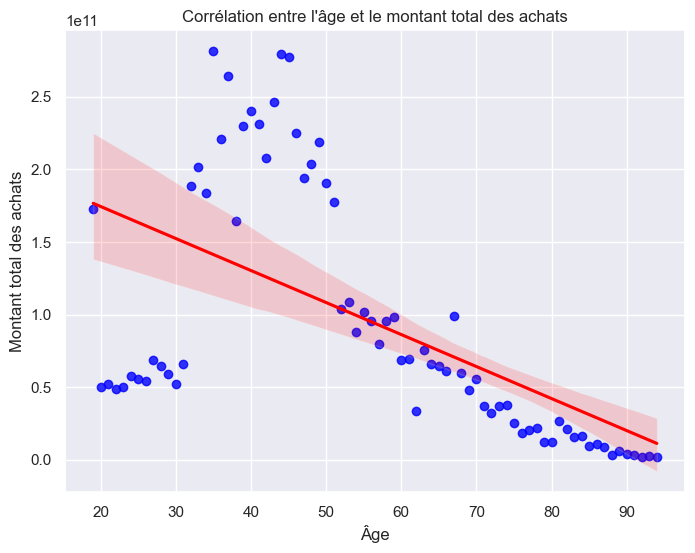

In [87]:
#Deux variables quantitatives
#Création du graphique de dispersion avec une ligne de régression

plt.figure(figsize=(8, 6))
sns.regplot(x=tmp.age, y=tmp.CA_total, marker='o', color='blue', line_kws={'color': 'red'})
plt.title('Corrélation entre l\'âge et le montant total des achats')
plt.xlabel('Âge')
plt.ylabel('Montant total des achats')
plt.grid(True)

# Age et frequence d'achat
## H0 : Pas de corrélation / p-value > 0.05
## H1 : Corrélation / p-value < 0.05


In [88]:
# Compter le nombre total de sessions pour chaque âge et ajouter une colonne frequence_achat
frequence_age = df_finale.groupby('age')['session_id'].count().reset_index()
frequence_age = frequence_age.rename(columns={'session_id': 'frequence_achat'})

In [89]:
# Effectuer le test de normalité de Shapiro-Wilk
shapiro_stat, shapiro_p_value = stats.shapiro(frequence_age['frequence_achat'])

# Affiche les résultats
print("Statistique de test de normalité (Shapiro-Wilk) :", shapiro_stat)
print("Valeur p du test de normalité (Shapiro-Wilk) :", shapiro_p_value)

alpha = 0.05  # Niveau de signification

if shapiro_p_value < alpha:
    print('La p-valeur est inférieure au niveau de signification.')
    print('On rejette l\'hypothèse nulle.')
    print('Les données ne suivent pas une distribution normale.')
else:
    print('La p-valeur est supérieure au niveau de signification.')
    print('On ne rejette pas l\'hypothèse nulle.')
    print('Les données suivent une distribution normale.')


Statistique de test de normalité (Shapiro-Wilk) : 0.8589648008346558
Valeur p du test de normalité (Shapiro-Wilk) : 5.637944013869856e-07
La p-valeur est inférieure au niveau de signification.
On rejette l'hypothèse nulle.
Les données ne suivent pas une distribution normale.


In [90]:
from scipy.stats import spearmanr

# Effectuer le test de corrélation de Spearman
corr_spearman, p_value_spearman = spearmanr(frequence_age['age'], frequence_age['frequence_achat'])

# Afficher les résultats
print("Coefficient de corrélation de Spearman :", corr_spearman)
print("Valeur p du test de Spearman :", p_value_spearman)

alpha = 0.05  # Niveau de signification

if p_value_spearman < alpha:
    print('La p-valeur est inférieure au niveau de signification.')
    print('On rejette l\'hypothèse nulle.')
    print('Il existe une corrélation significative entre les variables.')
else:
    print('La p-valeur est supérieure au niveau de signification.')
    print('On ne rejette pas l\'hypothèse nulle.')
    print('Il n\'y a pas de corrélation significative entre les variables.')


Coefficient de corrélation de Spearman : -0.6756527682843472
Valeur p du test de Spearman : 2.1466320003455262e-11
La p-valeur est inférieure au niveau de signification.
On rejette l'hypothèse nulle.
Il existe une corrélation significative entre les variables.


(0.0, 26000.0)

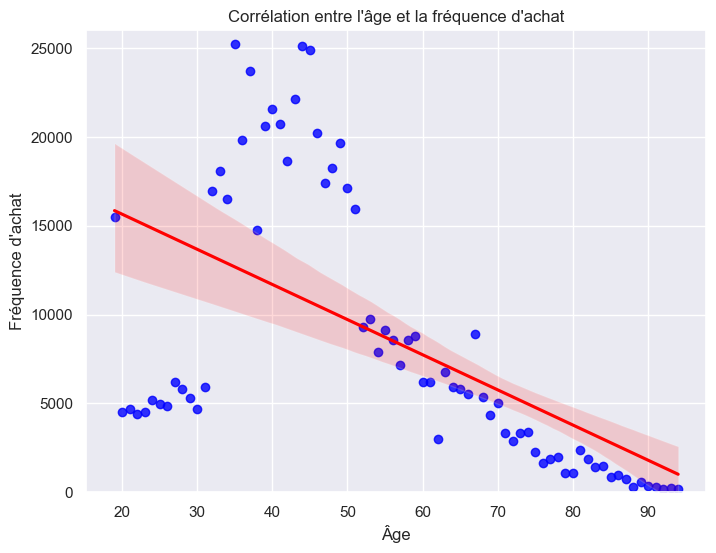

In [91]:
# Créez un graphique de dispersion avec une régression linéaire
plt.figure(figsize=(8, 6))
sns.regplot(x=frequence_age['age'], y=frequence_age['frequence_achat'], marker='o', color='blue', line_kws={'color': 'red'})
plt.title('Corrélation entre l\'âge et la fréquence d\'achat')
plt.xlabel('Âge')
plt.ylabel('Fréquence d\'achat')
plt.grid(True)
plt.ylim(0, 26000)

# Age et panier moyen 
## H0 : Il n'y a pas de différence significative entre les moyennes des groupes d'âge en ce qui concerne le panier moyen.

## H1 : Il existe des différences significatives entre au moins deux groupes d'âge en ce qui concerne le panier moyen.

In [92]:
# Calculer la moyenne de chaque catégorie pour la variable qualitative
panier_moyen_age = df_finale.groupby('age')['price'].mean().reset_index()

# Renommer la colonne 'price' en 'panier_moyen'
panier_moyen_age = panier_moyen_age.rename(columns={'price': 'panier_moyen_age'})

# Fusionner les informations de panier moyen par groupe d'âge dans le DataFrame principal
df_finale = pd.merge(df_finale, panier_moyen_age, on='age', how='left', suffixes=('', '_age'))

# Créer des tranches d'âge
bins = [20, 40, 60, float('inf')]
labels = ['Jeunes', 'Adultes', 'Personnes âgées']
df_finale['age_group'] = pd.cut(df_finale['age'], bins=bins, labels=labels, right=False)


In [93]:
# Test de Levene entre 'age_group' et 'panier_moyen'
stat_levene, p_value_levene = levene(df_finale['panier_moyen_age'][df_finale['age_group'] == 'Jeunes'],df_finale['panier_moyen_age'][df_finale['age_group'] == 'Adultes'],df_finale['panier_moyen_age'][df_finale['age_group'] == 'Personnes âgées'])

print(f"Statistique de Levene : {stat_levene}")
print(f"Valeur de p : {p_value_levene}")

# Interprétation du test de Levene
alpha = 0.05  # Niveau de signification
if p_value_levene < alpha:
    print("Les variances sont différentes.")
else:
    print("Les variances sont égales.")

Statistique de Levene : 65464.0987828402
Valeur de p : 0.0
Les variances sont différentes.


In [94]:
import pingouin as pg

# ANOVA de Welch
welch_anova_result = pg.welch_anova(data=df_finale, dv='panier_moyen_age', between='age_group')

# Afficher les résultats de l'ANOVA de Welch
print(welch_anova_result)

# Interprétation de l'ANOVA de Welch
alpha = 0.05  # Niveau de signification
if welch_anova_result['p-unc'][0] < alpha:
    print("Il existe des différences significatives entre au moins deux groupes.")
else:
    print("Aucune différence significative entre les groupes.")


      Source  ddof1          ddof2              F  p-unc       np2
0  age_group      2  362568.719782  501942.284187    0.0  0.156296
Il existe des différences significatives entre au moins deux groupes.


In [95]:
# Le test de Tukey 
if welch_anova_result['p-unc'][0] < alpha:
    posthoc_result = pg.pairwise_tukey(data=df_finale, dv='panier_moyen_age', between='age_group')
    print(posthoc_result)

         A                B    mean(A)    mean(B)      diff        se  \
0   Jeunes          Adultes  20.756621  14.104555  6.652065  0.019876   
1   Jeunes  Personnes âgées  20.756621  16.831527  3.925094  0.027358   
2  Adultes  Personnes âgées  14.104555  16.831527 -2.726972  0.026039   

            T  p-tukey    hedges  
0  334.676625      0.0  0.860379  
1  143.473104      0.0  0.396206  
2 -104.727070      0.0 -2.121684  


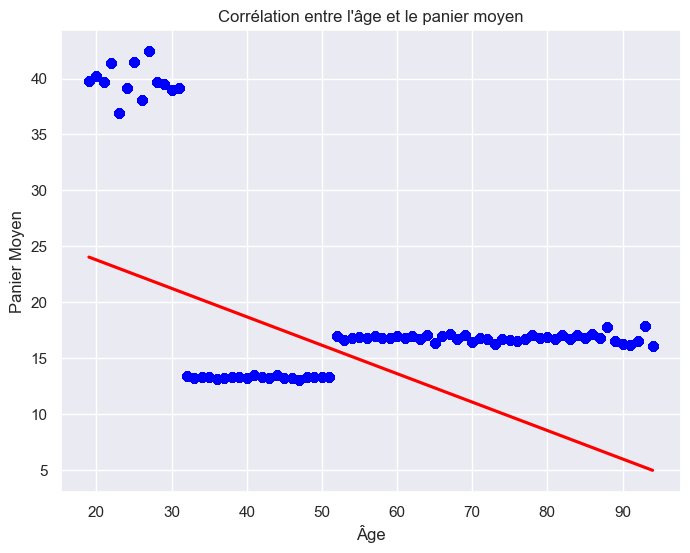

In [96]:
# Graph
# Créez un graphique de dispersion avec une régression linéaire
plt.figure(figsize=(8, 6))
sns.regplot(x=df_finale['age'], y=df_finale['panier_moyen_age'], marker='o', color='blue', line_kws={'color': 'red'})
plt.title('Corrélation entre l\'âge et le panier moyen')
plt.xlabel('Âge')
plt.ylabel('Panier Moyen')
plt.grid(True)